## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [7]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [9]:
data = get_data(data_path="motorbike_ambulance_calls.csv")

print(f"Основна статистична інформація по числовим змінним:\n{data.describe()}\n")
print(f"Максимальне значення по всім зміним:\n{data.max()}\n")
print(f"Мінімальне значення по всім зміним:\n{data.min()}\n")
print(f"Розмірність датасету:\n{data.shape}")

Основна статистична інформація по числовим змінним:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.0057

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [10]:
print(f"Кількість та типи даних по кожній змінній:\n{data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
Кількість та типи даних по кожній змінній:
None


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [11]:
missing_values = data.isnull().sum()
print(missing_values)

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**



1.  Основна статистична інформація, Максимальне та Мінімальне значення, Розмір датасету
2.  Кількість та типи даних для змінних 
3.  Після перевірки на пропуски їх не виявленно



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [13]:
def transform_date(df, date_col_name):
    df[date_col_name] = pd.to_datetime(df[date_col_name], format='%Y-%m-%d')
    return df

data = transform_date(data, 'date')

In [15]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [23]:
data_categorical = data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']]
print(data_categorical.head(5))

data_categorical.to_csv("data_categorical.csv", index=False)

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit
0       1   0     1   0        0        6           0           1
1       1   0     1   1        0        6           0           1
2       1   0     1   2        0        6           0           1
3       1   0     1   3        0        6           0           1
4       1   0     1   4        0        6           0           1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [19]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    df[season_col_name] = df[season_col_name].replace({'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}).infer_objects(copy=False)
    return df

data = encode_season(data, 'season')
print(data['season'].unique())

[1 2 3 4]


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

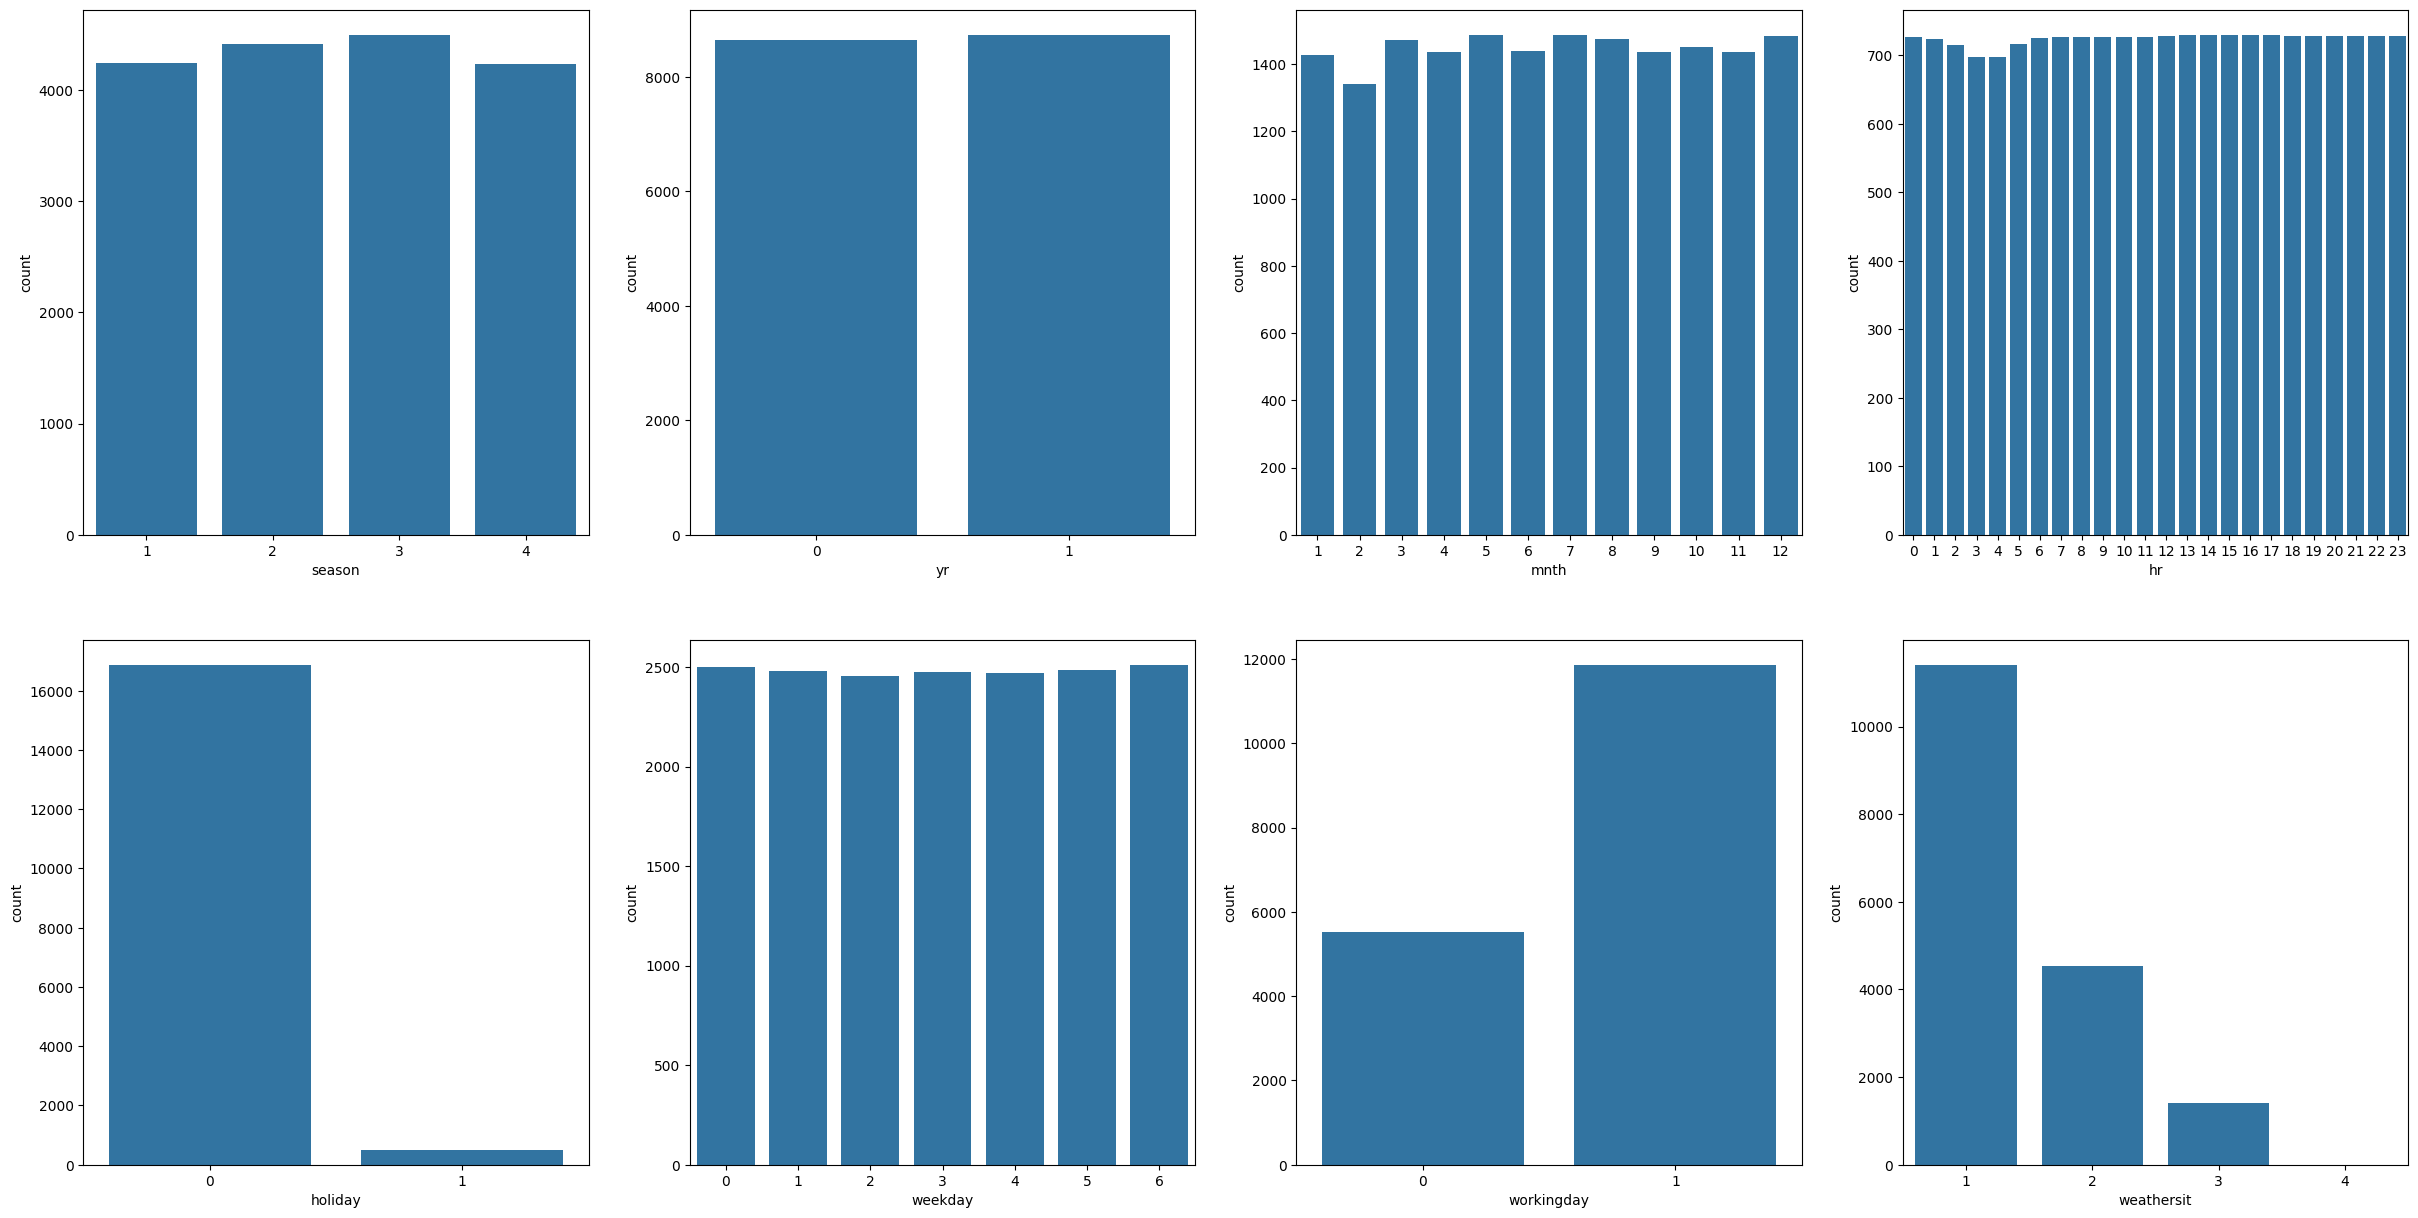

In [21]:
fig, ax = plt.subplots(2, 4, figsize=(30, 15))
for i, variable in enumerate(data_categorical.columns):
    sns.countplot(x=variable, data=data, ax=ax[i // 4, i % 4])

plt.show()

**Висновки з 5-7 завдання (детальні)**



1.  Щоб виділити категоріальні змінні ми використовуємо такі змінні як: season, yr, mnth, hr, holiday, weekday, workingday, weaathersit.
2.  Перетворимо атрибут season в числову шкалу, spring-1, summer-2, autumn-3, winter-4.
3.  Всі графіки рівномірні але є деякі графіки які відрізняються.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [25]:
data_numerical = ['temp', 'hum', 'windspeed', 'atemp', 'cnt']
data_numerical = data[data_numerical]
print(data_numerical.head(5))

data_numerical.to_csv("data_numerical.csv", index=False)

   temp   hum  windspeed   atemp  cnt
0  0.24  0.81        0.0  0.2879   16
1  0.22  0.80        0.0  0.2727   40
2  0.22  0.80        0.0  0.2727   32
3  0.24  0.75        0.0  0.2879   13
4  0.24  0.75        0.0  0.2879    1


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

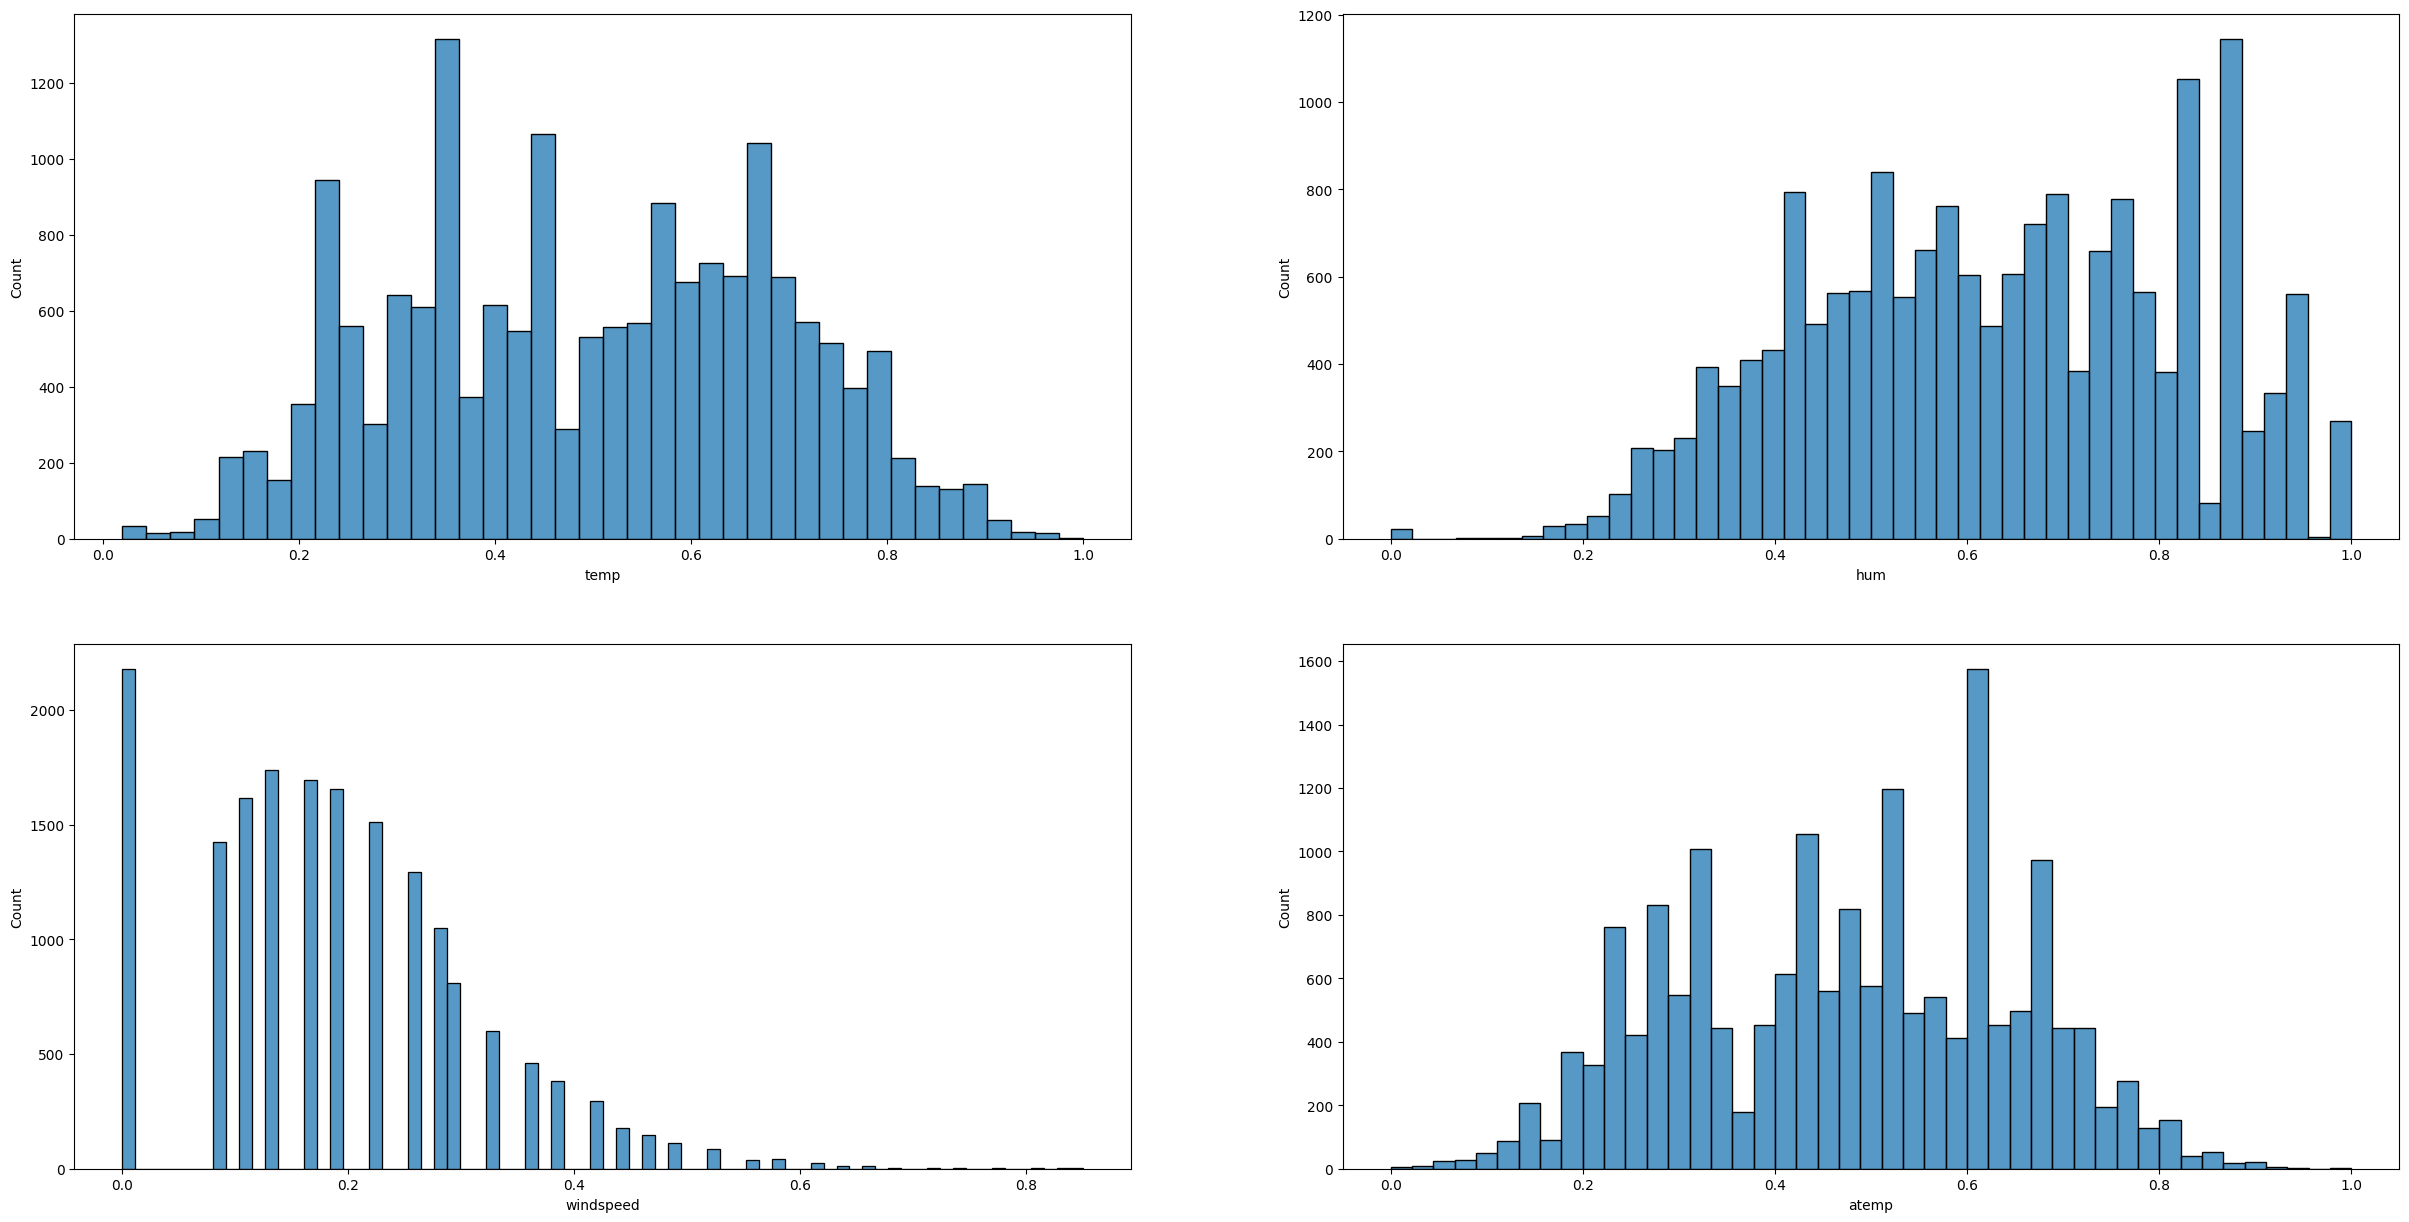

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(30, 15))
for variable, subplot in zip(data_numerical, ax.flatten()):
    sns.histplot(data=data, x=variable, ax=subplot)

plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Skewness:  1.2774116037490577


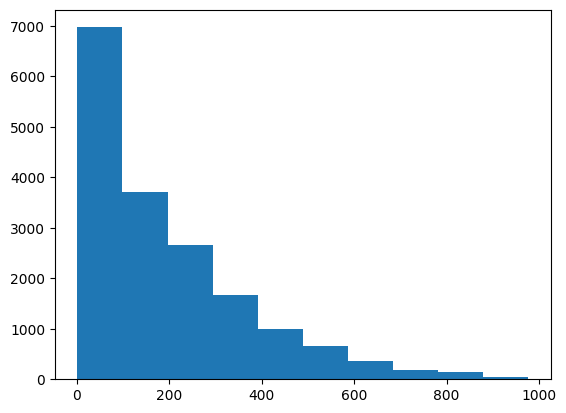

In [28]:
plt.hist(data['cnt'])
coefficient_skew = data['cnt'].skew()
print("Skewness: ", coefficient_skew)
plt.show()

**Висновки з 8-10 завдання (детальні)**



1.  Щоб виділити числові змінні використовуються такі змінні як: temp, hum, windspeed, cnt, atemp
2.  На графіках ми бачимо експоненційний та біномальний розподіл.
3.  Коефіцієнт нахилу у нас вийшов 1.2774116037490577.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

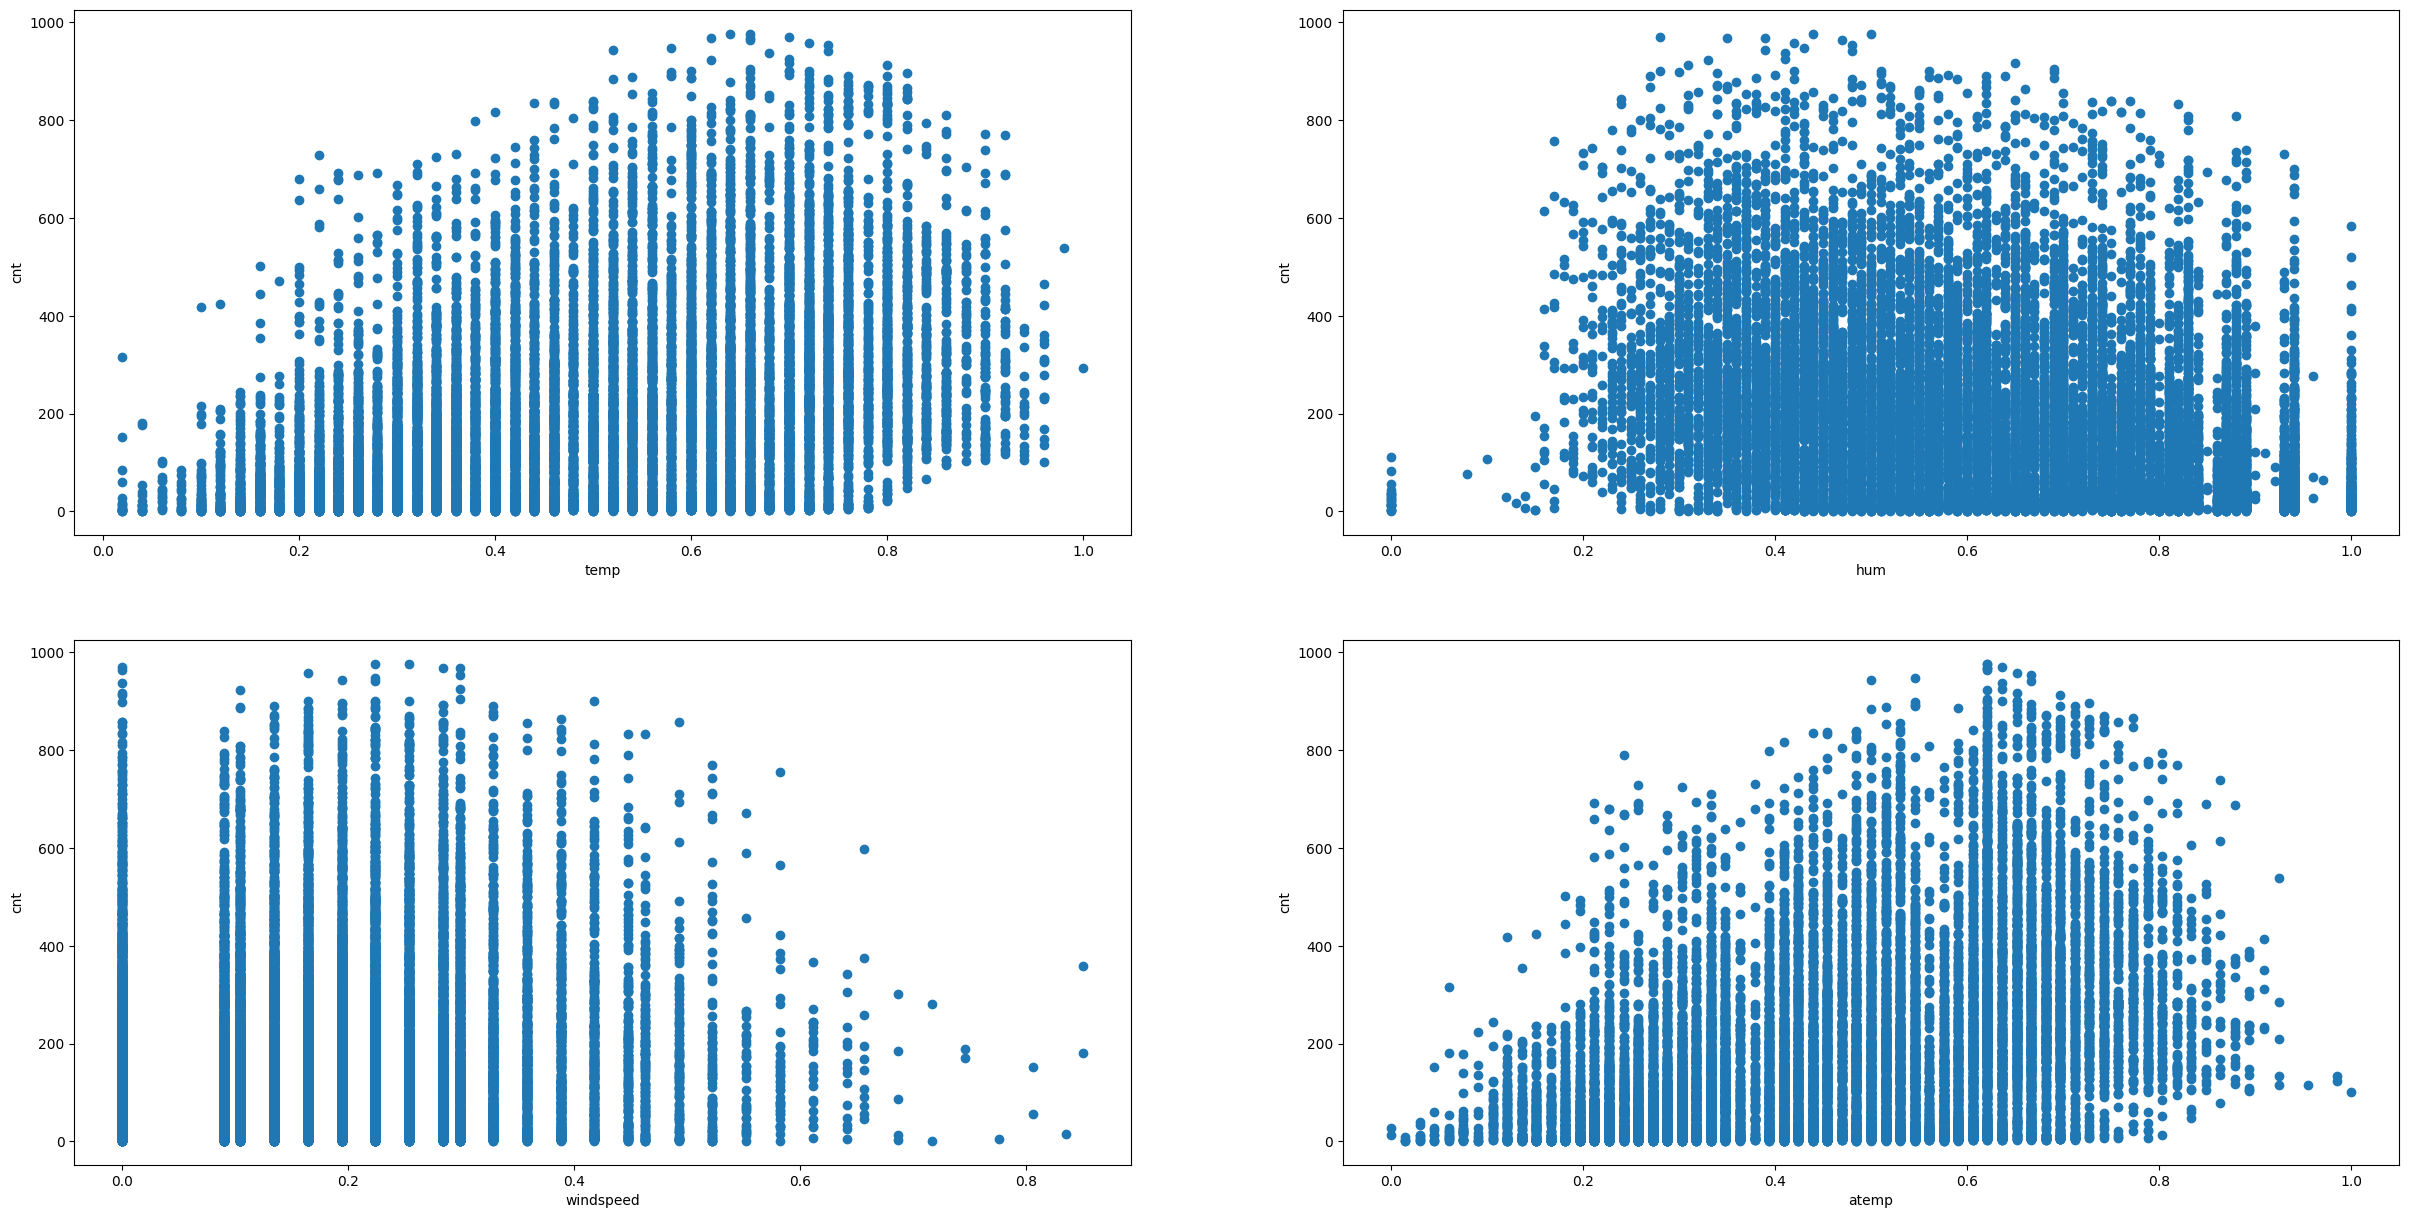

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(30, 15))
for var, subplot in zip(data_numerical.drop('cnt', axis=1), ax.flatten()):
    subplot.scatter(data[var], data['cnt'])
    subplot.set_xlabel(var)
    subplot.set_ylabel('cnt')
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

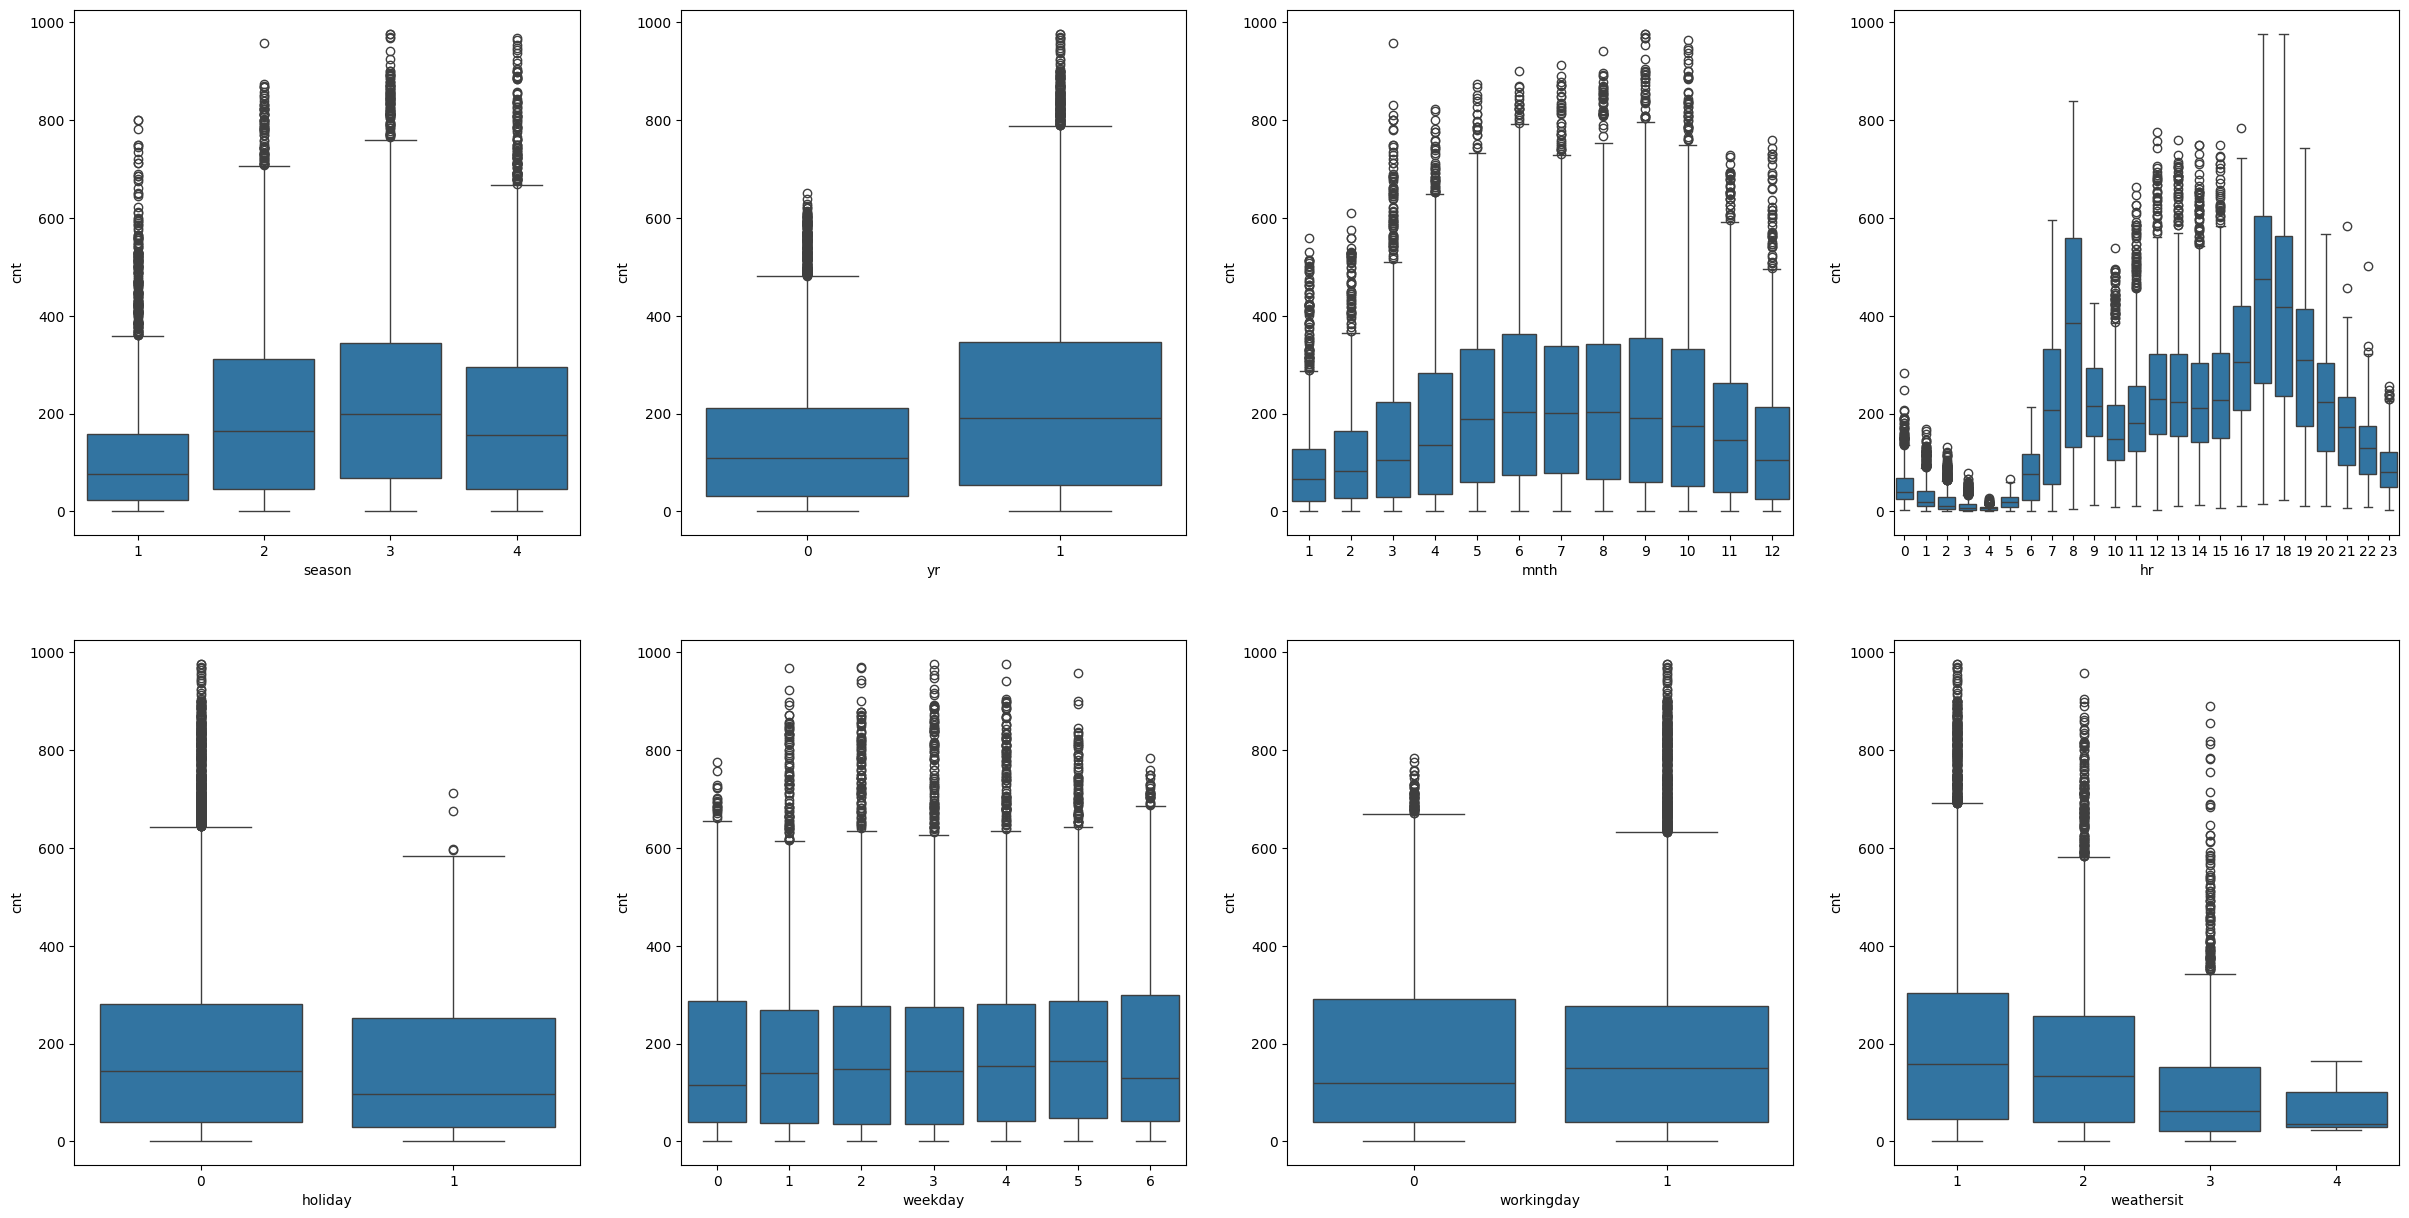

In [34]:
fig, ax = plt.subplots(2, 4, figsize=(30, 15))
for i, var in enumerate(data_categorical.columns):
    sns.boxplot(x=var, y='cnt', data=data, ax=ax[i // 4, i % 4])

plt.show()

**Висновки з 11-12 завдання (детальні)**



1. З цих графіків можна виділити графік windspeed та hr тому що на фоні інших графіків ці найбільше відрізняються



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

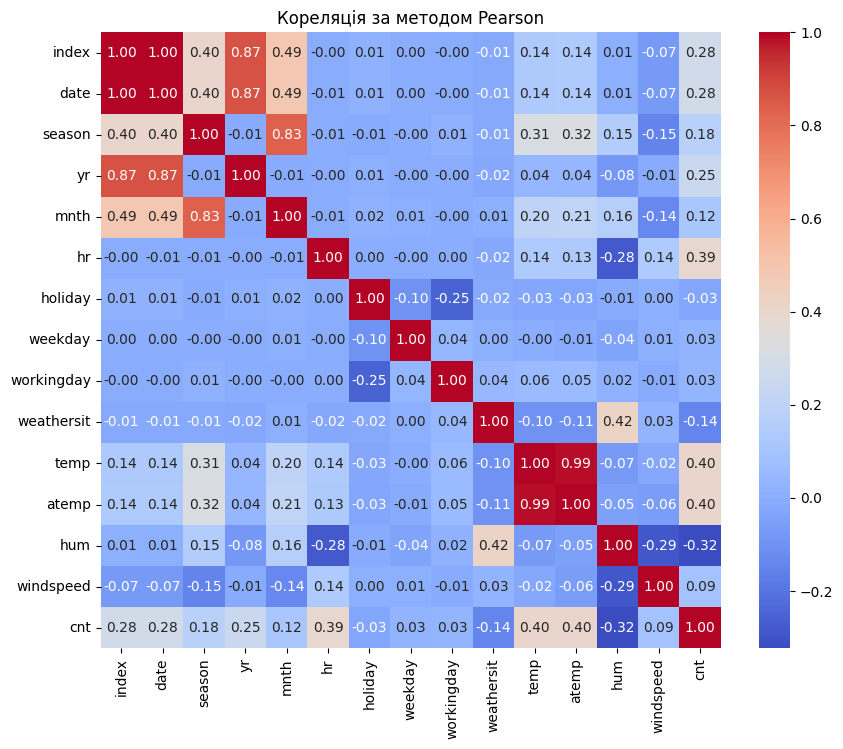

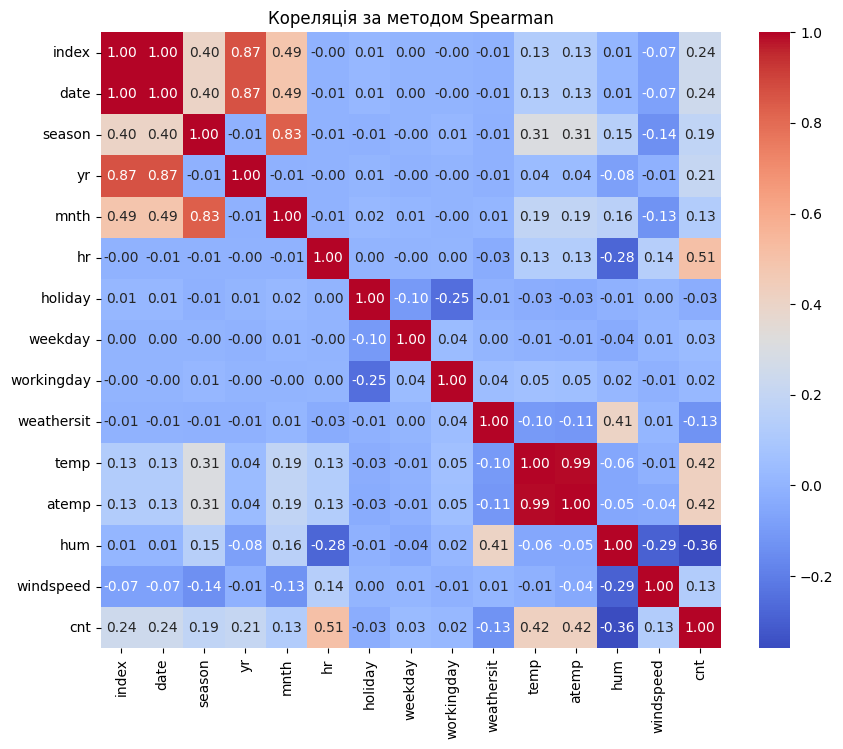

In [36]:
def plot_correlation_heatmap(data, method_name):
    correlation = data.corr(method=method_name)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Кореляція за методом {method_name.capitalize()}")
    plt.show()

plot_correlation_heatmap(data, 'pearson')
plot_correlation_heatmap(data, 'spearman')

In [ ]:
#Ці графіки майже нічим між собою не відрізняються бо мають погрішність (0,01-0,05).

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [38]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      # example:
                      pd.get_dummies(df['season']),
                      pd.get_dummies(df['mnth']),
                      pd.get_dummies(df['weekday']),
                      pd.get_dummies(df['weathersit'])
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features

In [41]:
features = get_dummies(data)
features

,index,date,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,...,1,2,3,4,5,6,1,2,3,4
0,1,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0000,...,False,False,False,False,False,True,True,False,False,False
1,2,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0000,...,False,False,False,False,False,True,True,False,False,False
2,3,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0000,...,False,False,False,False,False,True,True,False,False,False
3,4,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0000,...,False,False,False,False,False,True,True,False,False,False
4,5,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0000,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,19,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,False,True,False,False
17375,17376,2012-12-31,1,20,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,False,True,False,False
17376,17377,2012-12-31,1,21,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,True,False,False,False
17377,17378,2012-12-31,1,22,0,1,0.26,0.2727,0.56,0.1343,...,True,False,False,False,False,False,True,False,False,False


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [42]:
features['night_hours'] = (data['hr'] >= 0) |(data['hr'] <= 6) 
features = features.drop('hr', axis = 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [44]:
features_lr = features.drop(['atemp', 'date'], axis=1)

In [51]:
def get_train_data(df: pd.DataFrame, target: str, test_size: float):
    X = df.drop(target, axis=1)
    y = df[target]
    X.columns = X.columns.astype(str)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    return X_train, X_test, y_train, y_test

In [52]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [53]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [54]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 21922.219, test: 21089.308
R^2 train: 0.345, test: 0.332


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

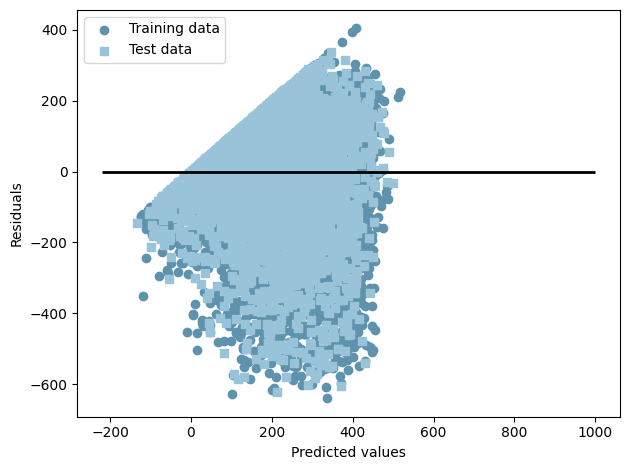

In [55]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.  Було створенно нові змінні для кожної категоріальної змінної для того зоб уникнути невірного порядку категорій
